<a href="https://colab.research.google.com/github/chitrak2000/TCSstockprediction/blob/main/TCSstockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving TCS.BO.csv to TCS.BO.csv


In [ ]:
#store the data into a data frame
df = pd.read_csv('TCS.BO.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,3744.000000,3829.000000,3743.949951,3818.149902,3691.445313,67010
1,2022-01-04,3829.050049,3888.000000,3810.000000,3882.699951,3753.853760,342652
2,2022-01-05,3865.000000,3870.100098,3811.000000,3861.050049,3732.922119,54550
3,2022-01-06,3816.000000,3834.750000,3771.350098,3806.850098,3680.520508,111898
4,2022-01-07,3809.100098,3864.449951,3796.000000,3854.850098,3726.927734,41904
5,2022-01-10,3974.000000,3979.899902,3861.850098,3879.350098,3750.614990,244605


In [ ]:
#get the number of trading days
df.shape

(313, 7)

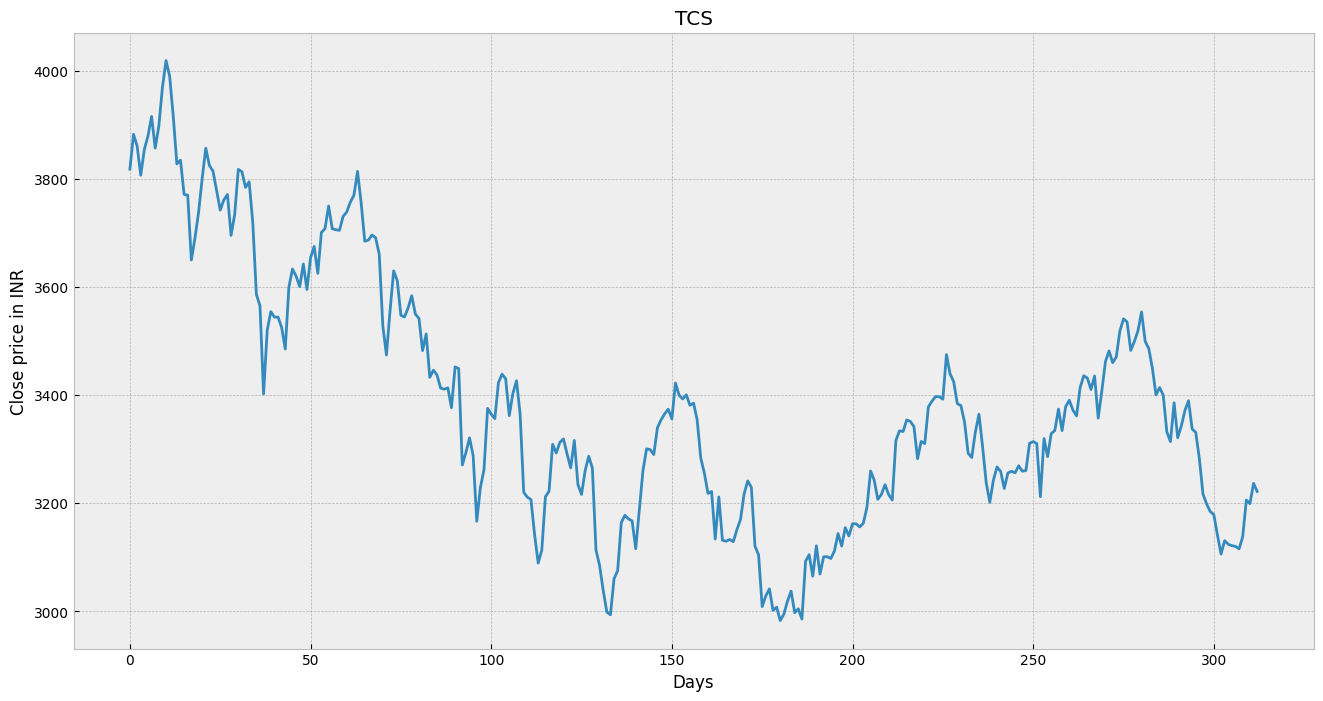

In [ ]:
#visualize the close price data
plt.figure(figsize=(16,8))
plt.title('TCS')
plt.xlabel('Days')
plt.ylabel('Close price in INR')
plt.plot(df['Close'])
plt.show()

In [ ]:
#get the close price
df = df[['Close']]
df.head(4)

,Close
0,3818.149902
1,3882.699951
2,3861.050049
3,3806.850098


In [ ]:
#create a variable to predict the 'x' dats out into the future
future_days = 25
#create a new coloumn (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
309,3205.800049,NaN
310,3199.250000,NaN
311,3236.800049,NaN
312,3221.699951,NaN


In [ ]:
#create the feature data set(x) and convert it to a numpy array and remove the last 'x' rows/days

X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[3818.149902]
 [3882.699951]
 [3861.050049]
 [3806.850098]
 [3854.850098]
 [3879.350098]
 [3915.800049]
 [3857.25    ]
 [3897.649902]
 [3969.25    ]
 [4019.100098]
 [3990.25    ]
 [3915.800049]
 [3827.850098]
 [3834.850098]
 [3771.5     ]
 [3770.100098]
 [3650.100098]
 [3690.25    ]
 [3737.899902]
 [3800.649902]
 [3857.      ]
 [3825.      ]
 [3814.649902]
 [3778.600098]
 [3742.399902]
 [3761.25    ]
 [3771.199951]
 [3695.600098]
 [3734.25    ]
 [3817.699951]
 [3813.550049]
 [3784.449951]
 [3794.800049]
 [3720.25    ]
 [3586.649902]
 [3565.300049]
 [3402.25    ]
 [3519.699951]
 [3554.550049]
 [3544.350098]
 [3544.449951]
 [3525.199951]
 [3485.300049]
 [3599.949951]
 [3633.350098]
 [3620.100098]
 [3600.699951]
 [3642.699951]
 [3595.399902]
 [3654.25    ]
 [3675.199951]
 [3625.25    ]
 [3700.949951]
 [3708.25    ]
 [3750.      ]
 [3707.949951]
 [3706.050049]
 [3704.949951]
 [3730.649902]
 [3738.800049]
 [3756.850098]
 [3769.800049]
 [3814.050049]
 [3756.149902]
 [3684.949951]
 [3686.850

<ipython-input-8-020d18cc23d7>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [ ]:
#create the target data set (y) and convert it into a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days] 
print(y)

[3742.399902 3761.25     3771.199951 3695.600098 3734.25     3817.699951
 3813.550049 3784.449951 3794.800049 3720.25     3586.649902 3565.300049
 3402.25     3519.699951 3554.550049 3544.350098 3544.449951 3525.199951
 3485.300049 3599.949951 3633.350098 3620.100098 3600.699951 3642.699951
 3595.399902 3654.25     3675.199951 3625.25     3700.949951 3708.25
 3750.       3707.949951 3706.050049 3704.949951 3730.649902 3738.800049
 3756.850098 3769.800049 3814.050049 3756.149902 3684.949951 3686.850098
 3696.399902 3691.449951 3661.300049 3528.449951 3474.300049 3555.949951
 3629.949951 3611.850098 3547.699951 3544.649902 3561.300049 3584.
 3550.100098 3542.050049 3482.449951 3513.300049 3433.       3446.100098
 3437.25     3412.899902 3411.       3413.449951 3376.649902 3452.199951
 3449.       3270.699951 3293.899902 3320.949951 3288.050049 3166.600098
 3228.600098 3262.199951 3375.550049 3364.800049 3356.5      3422.949951
 3438.800049 3430.25     3362.       3403.050049 3426.550049 

In [ ]:
#split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [ ]:
#create the models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#get the last x rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-12-d2b1cb428b88>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[3414.      ],
       [3435.850098],
       [3431.550049],
       [3410.399902],
       [3435.399902],
       [3357.449951],
       [3407.649902],
       [3461.949951],
       [3481.850098],
       [3460.      ],
       [3470.649902],
       [3518.699951],
       [3541.149902],
       [3535.449951],
       [3482.75    ],
       [3499.149902],
       [3518.899902],
       [3553.949951],
       [3499.649902],
       [3486.100098],
       [3449.399902],
       [3400.550049],
       [3414.100098],
       [3400.050049],
       [3331.850098]])

In [ ]:
#show the model tree prediciton
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[3314.149902 3385.850098 3321.149902 3342.75     3371.5      3260.300049
 3337.449951 3198.75     3282.399902 3212.       3198.75     3184.75
 3362.       3362.       3105.899902 3130.699951 3124.       3121.449951
 3120.100098 3115.5      3212.       3205.800049 3314.149902 3041.399902
 3221.699951]

[3354.53758654 3365.45405128 3363.30571614 3352.73895191 3365.22913015
 3326.28477889 3351.36503231 3378.49372391 3388.43597923 3377.51951449
 3382.84028146 3406.84642851 3418.06258408 3415.21484793 3388.88557669
 3397.07908465 3406.94632545 3424.45757982 3397.32888821 3390.55930953
 3372.22362996 3347.81789513 3354.58759621 3347.56809156 3313.49490982]


<ipython-input-14-131c2264d1ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


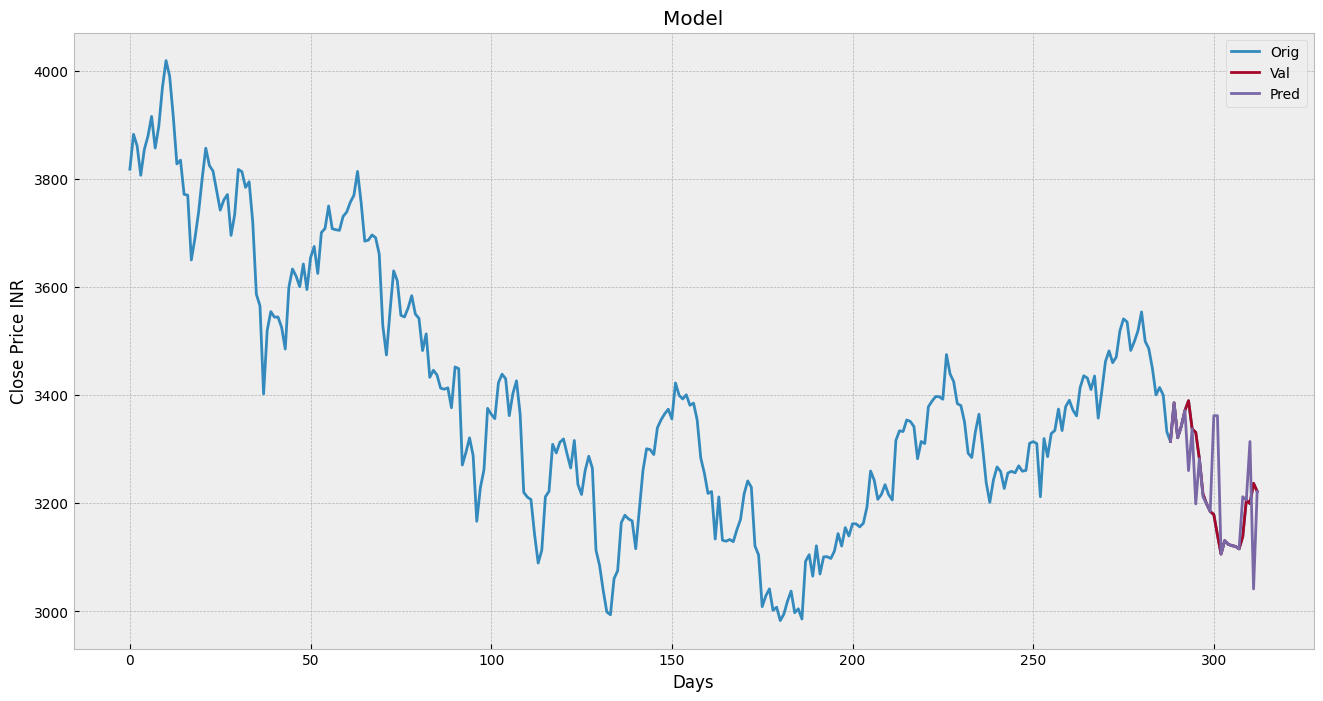

In [ ]:
#visualize the data
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

<ipython-input-15-889dfbdae795>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


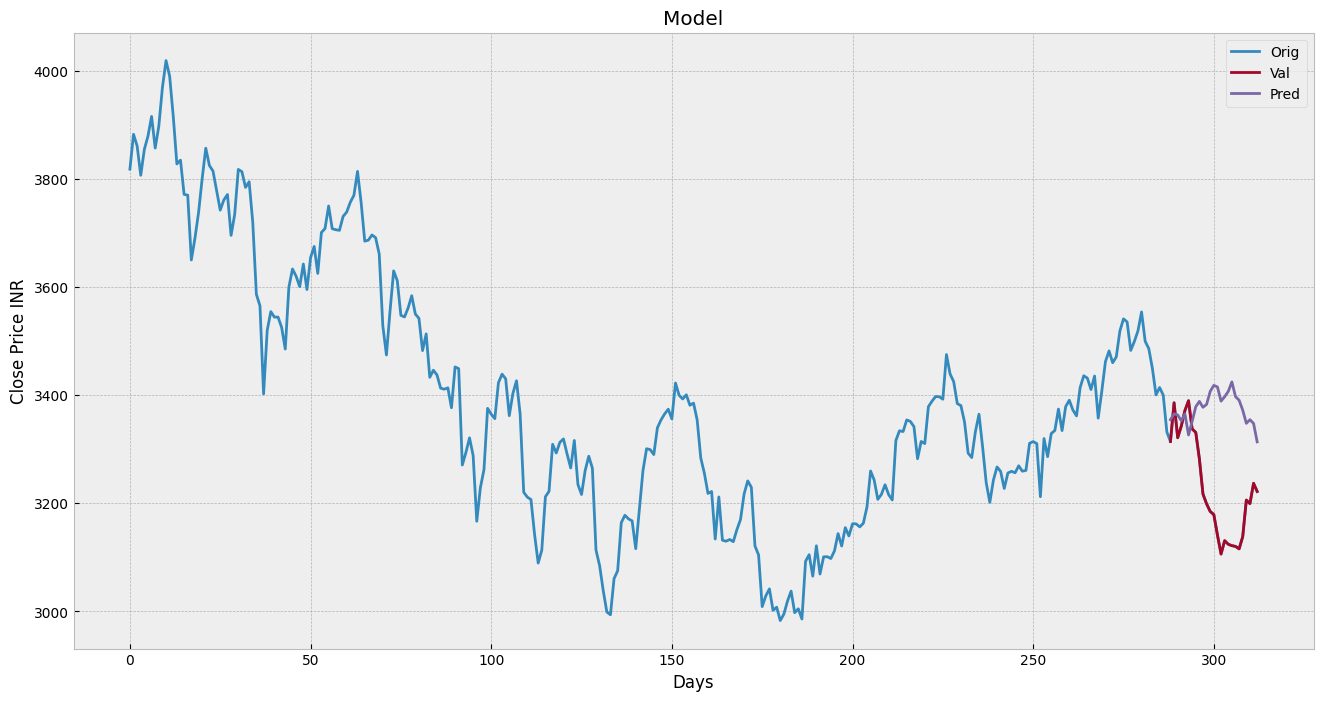

In [ ]:
#visualize the data
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()